In [15]:
%matplotlib inline  
# !pip install matplotlib

import pandas as pd
import pandas_highcharts.core
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot 



import os


os.environ.setdefault("DJANGO_SETTINGS_MODULE", "IMAM.settings")

from django.conf import settings
from home.management.commands.load_data import rename_cols, assign_state_lga_num

import django
django.setup()

from home.models import Site

In [16]:
engine = create_engine(
    'postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{NAME}'.format(**settings.DATABASES['default']))
df = pd.read_sql_query("select * from program;", con=engine)

In [17]:
df.weeknum.unique()

array([u'42', u'26', u'23', u'22', u'24', u'25', u'27', u'28', u'29',
       u'30', u'31', u'32', u'33', u'34', u'35', u'36', u'37', u'38',
       u'39', u'40', u'41', u'43', u'44', u'45', u'46', u'47', u'48',
       u'49', u'50', u'51', u'52', u'1', u'2', u'3', u'4', u'5', u'6',
       u'Pro', u'PRO', u'53', u'54', u'14', u'P', u'Reg', u'Y', u'18',
       u'11', u'21', u'20', u'19', u'7', u'82', u'Same', u'REGISTRATION',
       u'70', u'15', u'10',
       u'No peament for rapid pro treaning no report.',
       u'You have send SMS training  allaunces to anyone except me', u'N',
       u'No', u'.32', u'197',
       u'You a not sending data with pay for the traning',
       u'I WILL NOT SEND REPORT UNTILL OUR TRENING MONEY HAS PAID', u'Pso',
       u'222', u'56', u'1.5', u'9', u'YES', u'0', u'Week', u'215', u'Yes',
       u'SaAM', u'NO', u'STO', u'Death', u'S', u'8', u'Sto', u'WEEK49',
       None, u'252', u'N ', u'PRO   ', u'Valid', u'y',
       u'Why charging my report', u'.31', u'84',

In [18]:
# Convert to int
df['amar'] = pd.to_numeric(df.amar, errors='coerce')
df['weeknum'] = pd.to_numeric(df.weeknum, errors='coerce')

In [19]:
# df_filtered
# remove crap data
df_filtered = df.query('weeknum==weeknum').query('0.99<weeknum<53')

In [20]:
df_filtered.weeknum.unique()
# remove decimals points

array([ 42. ,  26. ,  23. ,  22. ,  24. ,  25. ,  27. ,  28. ,  29. ,
        30. ,  31. ,  32. ,  33. ,  34. ,  35. ,  36. ,  37. ,  38. ,
        39. ,  40. ,  41. ,  43. ,  44. ,  45. ,  46. ,  47. ,  48. ,
        49. ,  50. ,  51. ,  52. ,   1. ,   2. ,   3. ,   4. ,   5. ,
         6. ,  14. ,  18. ,  11. ,  21. ,  20. ,  19. ,   7. ,  15. ,
        10. ,   1.5,   9. ,   8. ,  16. ,  12. ,  13. ,   5.1,  52.1,  17. ])

In [21]:
df_filtered['weeknum'] = df_filtered.weeknum.astype('int')

In [22]:
df_filtered.weeknum.unique()

array([42, 26, 23, 22, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,  1,  2,  3,
        4,  5,  6, 14, 18, 11, 21, 20, 19,  7, 15, 10,  9,  8, 16, 12, 13,
       17])

In [23]:
df_filtered["amar"]

0         NaN
1         NaN
2        10.0
3         8.0
4        13.0
5         8.0
6        14.0
7        13.0
8        13.0
9        17.0
10        8.0
11       14.0
12       13.0
13       17.0
14        6.0
15       14.0
16       14.0
17       14.0
18       20.0
19       10.0
20       15.0
21        NaN
22       22.0
23       27.0
24       20.0
25       22.0
26       27.0
27       20.0
28       22.0
29       14.0
         ... 
31285     5.0
31286     6.0
31287     5.0
31288    10.0
31289     4.0
31290     8.0
31291    17.0
31292     2.0
31293    10.0
31294     7.0
31295    11.0
31296     0.0
31297     2.0
31298     7.0
31299     5.0
31300     3.0
31301     NaN
31302     7.0
31303     7.0
31304    10.0
31305     6.0
31306     5.0
31307    68.0
31308    15.0
31309     5.0
31310     5.0
31311    19.0
31312    15.0
31313    12.0
31314    12.0
Name: amar, dtype: float64

In [24]:
# with non id variables - set NaN to zero

# df_filtered["amar"] = df_filtered["amar"].fillna((0), inplace=True)
# sets everything to none

# df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=True)
#  df_filtered["amar"].fillna((0), inplace=True)

df_filtered["amar"]

0         NaN
1         NaN
2        10.0
3         8.0
4        13.0
5         8.0
6        14.0
7        13.0
8        13.0
9        17.0
10        8.0
11       14.0
12       13.0
13       17.0
14        6.0
15       14.0
16       14.0
17       14.0
18       20.0
19       10.0
20       15.0
21        NaN
22       22.0
23       27.0
24       20.0
25       22.0
26       27.0
27       20.0
28       22.0
29       14.0
         ... 
31285     5.0
31286     6.0
31287     5.0
31288    10.0
31289     4.0
31290     8.0
31291    17.0
31292     2.0
31293    10.0
31294     7.0
31295    11.0
31296     0.0
31297     2.0
31298     7.0
31299     5.0
31300     3.0
31301     NaN
31302     7.0
31303     7.0
31304    10.0
31305     6.0
31306     5.0
31307    68.0
31308    15.0
31309     5.0
31310     5.0
31311    19.0
31312    15.0
31313    12.0
31314    12.0
Name: amar, dtype: float64

In [26]:
#df_filtered['amar'] = df_filtered.amar.astype('int')
# cannot cast variable with NaN to int

# df_filtered.sort_values(by='amar')


In [31]:
import math
print type(df_filtered['amar'])
# TypeError: cannot convert the series to <type 'float'>
# df_filtered['amar'] = math.floor(df_filtered['amar'])

<class 'pandas.core.series.Series'>


In [32]:
df_filtered.amar.unique()

array([             nan,   1.00000000e+01,   8.00000000e+00,
         1.30000000e+01,   1.40000000e+01,   1.70000000e+01,
         6.00000000e+00,   2.00000000e+01,   1.50000000e+01,
         2.20000000e+01,   2.70000000e+01,   0.00000000e+00,
         2.10000000e+01,   2.40000000e+01,   2.30000000e+01,
         1.80000000e+01,   5.00000000e+00,   7.00000000e+00,
         1.60000000e+01,   3.20000000e+01,   3.60000000e+01,
         1.01000000e+02,   9.00000000e+00,   1.90000000e+01,
         3.30000000e+01,   8.80000000e+01,   1.20000000e+01,
         4.00000000e+00,   1.10000000e+01,   2.80000000e+01,
         2.50000000e+01,   2.08000000e+02,   7.90000000e+01,
         3.70000000e+01,   2.00000000e+00,   1.00000000e+00,
         3.00000000e+00,   6.00000000e+01,   2.60000000e+01,
         4.80000000e+01,   1.18000000e+02,   3.45000000e+02,
         3.23000000e+02,   3.10000000e+01,   4.70000000e+01,
         1.13000000e+02,   4.60000000e+01,   1.08000000e+02,
         5.90000000e+01,

In [33]:
df_filtered = assign_state_lga_num(df_filtered)
adm_by_week = df_filtered['amar'].groupby(df_filtered['weeknum']).sum()

print type (adm_by_week)
print adm_by_week


<class 'pandas.core.series.Series'>
weeknum
1     13553.14
2      9550.12
3      9123.00
4      8981.00
5      6784.00
6      4780.00
7       191.00
8       115.00
9       160.00
10      234.00
11       66.00
12        4.00
13       25.00
14      103.00
15       10.00
16       64.00
17         NaN
18      362.00
19        9.00
20       32.00
21       18.00
22     1754.00
23     2121.00
24     1840.00
25     1663.00
26     2075.00
27     3676.00
28     5145.00
29     4657.00
30     4633.00
31    12803.00
32    10547.17
33    15004.00
34     9599.10
35    11392.00
36    19455.00
37    12216.00
38    24700.00
39    22140.00
40    19912.12
41    22253.00
42    19093.00
43    19037.00
44    21710.17
45    25103.00
46    21048.00
47    16145.00
48    14561.00
49    17445.00
50    15500.00
51    13284.00
52    12868.15
Name: amar, dtype: float64


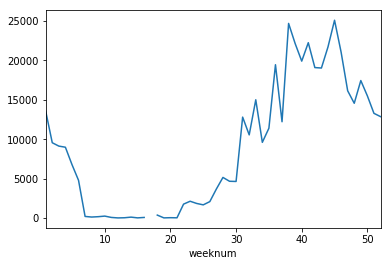

In [34]:
adm_by_week.plot()

In [35]:
# data cleaning on state num
df_filtered['state_num'] = pd.to_numeric(df_filtered.state_num, errors='coerce')
df_filtered = df_filtered.query('state_num==state_num').query('0<state_num<37')
df_filtered['state_num'] = df_filtered.state_num.astype('int')
df_filtered.state_num.unique()

array([ 4, 33, 35,  1, 36, 16,  5, 17, 18,  8,  2, 21, 20, 22, 19,  3])

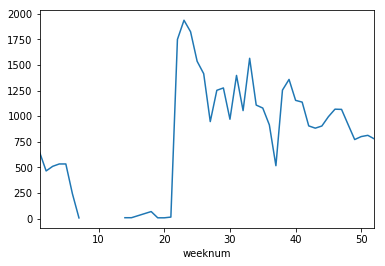

In [36]:
adm_by_week = df_filtered.query('state_num==33')['amar'].groupby(df_filtered['weeknum']).sum()

adm_by_week.plot()

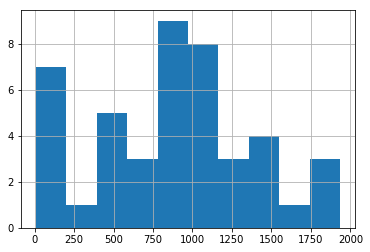

In [44]:
adm_by_week.hist()

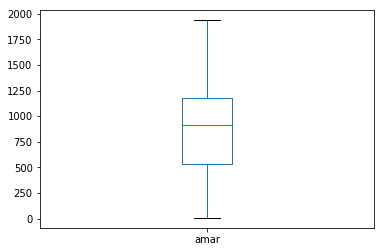

In [45]:
adm_by_week.plot(kind="box")

In [1]:
# No longer using pandas_highcharts
# chart = pandas_highcharts.core.serialize(adm_by_week.to_frame(), render_to='my-chart',output_type='json')
# chart

In [17]:
"12".isdigit()

True

In [18]:
"something".isdigit()

False

In [25]:
type(df_filtered)


pandas.core.frame.DataFrame

In [1]:
type(df_filtered['amar'])


NameError: name 'df_filtered' is not defined

In [26]:
# Assign state and LGA numbers to data frame
df = assign_state_lga_num(df)


In [27]:
# Convert to float
df['amar'] = pd.to_numeric(df.amar, errors='coerce')
df['weeknum'] = pd.to_numeric(df.weeknum, errors='coerce')
df['state_num'] = pd.to_numeric(df.state_num, errors='coerce')
df['lga_num'] = pd.to_numeric(df.lga_num, errors='coerce')

In [28]:
# Clean out of range data
df_filtered = df.query('weeknum==weeknum').query('0<weeknum<53')
df_filtered = df_filtered.query('amar==amar').query('0<amar<99999')
df_filtered = df_filtered.query('state_num==state_num').query('0<state_num<37')
df_filtered = df_filtered.query('lga_num==lga_num').query('101<lga_num<3799')

In [29]:
# Set to int - so that decimal points are not presented
df_filtered['weeknum'] = df_filtered.weeknum.astype('int')
df_filtered['amar'] = df_filtered.amar.astype('int')
df_filtered['state_num'] = df_filtered.state_num.astype('int')
df_filtered['lga_num'] = df_filtered.lga_num.astype('int')

In [30]:
adm_by_week = df_filtered.query('lga_num==201')['amar'].groupby(df_filtered['weeknum']).sum()


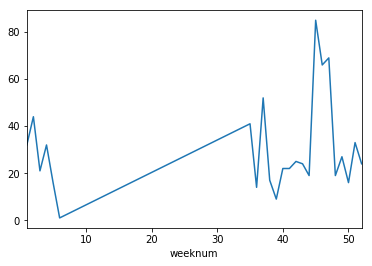

In [31]:
adm_by_week.plot()

In [33]:
# length of list of all indices of adm_by_week
print len(list(adm_by_week))
print len(adm_by_week)
adm_by_week.index

24
24


Int64Index([ 1,  2,  3,  4,  5,  6, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
            46, 47, 48, 49, 50, 51, 52],
           dtype='int64', name=u'weeknum')

In [34]:
list(zip(adm_by_week.index, adm_by_week.values.tolist()))

[(1, 32),
 (2, 44),
 (3, 21),
 (4, 32),
 (5, 16),
 (6, 1),
 (35, 41),
 (36, 14),
 (37, 52),
 (38, 17),
 (39, 9),
 (40, 22),
 (41, 22),
 (42, 25),
 (43, 24),
 (44, 19),
 (45, 85),
 (46, 66),
 (47, 69),
 (48, 19),
 (49, 27),
 (50, 16),
 (51, 33),
 (52, 24)]

In [35]:
# Data cleaning

In [69]:
dataframe = df_filtered
list = ('amar', 'weeknum', 'state_num', 'lga_num', 'siteid', 'dcur', 'dead', 'defu', 'dmed', 'tout')


In [70]:
def convert_to_float(dataframe, list):
    # edit the data in pandas

    for l in list:
        dataframe[l] = pd.to_numeric(dataframe[l], errors='coerce')

#     df['amar'] = pd.to_numeric(df.amar, errors='coerce')
#     df['weeknum'] = pd.to_numeric(df.weeknum, errors='coerce')
#     df['state_num'] = pd.to_numeric(df.state_num, errors='coerce')
#     df['lga_num'] = pd.to_numeric(df.lga_num, errors='coerce')
#     df['siteid'] = pd.to_numeric(df.siteid, errors='coerce')

    return dataframe

In [76]:
for l in list:
    print dataframe[l]

2        10
3         8
4        13
5         8
6        14
7        13
8        13
9        17
10        8
11       14
12       13
13       17
14        6
15       14
16       14
17       14
18       20
19       10
20       15
22       22
23       27
24       20
25       22
26       27
27       20
28       22
29       14
30       14
33       21
34       22
         ..
31283     4
31284     3
31285     5
31286     6
31287     5
31288    10
31289     4
31290     8
31291    17
31292     2
31293    10
31294     7
31295    11
31297     2
31298     7
31299     5
31300     3
31302     7
31303     7
31304    10
31305     6
31306     5
31307    68
31308    15
31309     5
31310     5
31311    19
31312    15
31313    12
31314    12
Name: amar, dtype: int64
2        26
3        23
4        22
5        23
6        24
7        25
8        25
9        26
10       23
11       24
12       25
13       26
14       27
15       28
16       28
17       28
18       29
19       30
20       31
22       32
23 

In [72]:
# Set data points to NaN
# import numpy as np
# df_filtered.tout = df_filtered.tout.replace(np.NaN,0)
# df_filtered.tout = df_filtered.tout.replace(None,0)

# # Replace none with NaN
# DataFrame.fillna(value=np.nan, inplace=True)
# # Replace NaN with zero
# df = df.fillna(0)


In [75]:
# Does fillna replace None ?
df['dmed'] = df['dmed'].fillna(0)
print df['dmed']

KeyError: 'dmed'

In [63]:
# create dataframe with NaN
df = pd.DataFrame(np.nan, index=[0,1,2,3], columns=['A'])
df

,A
0,NaN
1,NaN
2,NaN
3,NaN


In [62]:
# convert those NaN into zeros
df['A'] = df['A'].fillna(0)
df

,A
0,0.0
1,0.0
2,0.0
3,0.0


In [68]:
df = pd.DataFrame(None, index=[0,1,2,3], columns=['A'])
df

,A
0,NaN
1,NaN
2,NaN
3,NaN


In [67]:
data = [{'1': None},
         {'2': None},
         {'3': None}]
df = pd.DataFrame(data)
df

,1,2,3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN


In [39]:
# Total Discharges
df_filtered['total_discharges'] = df_filtered.dcur + df_filtered.dead + df_filtered.defu + df_filtered.dmed

# Total Exits - Cout (Mike Golden term)
df_filtered['total_exits'] = df_filtered.total_discharges + df_filtered.tout

In [40]:
# Print columns
columnsTitles = ['dcur', 'dead', 'defu', 'dmed', 'tout','total_discharges', 'total_exits']

df2 = df_filtered.reindex(columns=columnsTitles)
print df2

       dcur  dead  defu  dmed  tout total_discharges total_exits
2        12     0     1     0     0            12010      120100
3        10     0     0     0     0            10000      100000
4        15     0     1     0     0            15010      150100
5        10     0     0     0     0            10000      100000
6         2     0     1     0     0             2010       20100
7         0     0     0     0     0             0000       00000
8        24     0     0     0     0            24000      240000
9         8     0     0     2     0             8002       80020
10       10     0     0     0     0            10000      100000
11        2     0     1     0     0             2010       20100
12       24     0     0     0     0            24000      240000
13        8     0     2     2     0             8022       80220
14       18     0     0     0     0            18000      180000
15        0  None  None  None  None              NaN         NaN
16        5     0     0  

In [41]:
# df_filtered.head()

In [99]:
# Recast to int
def cast_to_int(dataframe, list):
    for l in list:
        dataframe[l] = dataframe[l].astype('int')
        # Remove all instances of NaN
        dataframe[l] = dataframe[l].where((pd.notnull(df)), 0)
    return dataframe

In [100]:
for l in list:
    print dataframe[l].head()

2    10
3     8
4    13
5     8
6    14
Name: amar, dtype: int64
2    26
3    23
4    22
5    23
6    24
Name: weeknum, dtype: int64
2    33
3    33
4    33
5    33
6    33
Name: state_num, dtype: int64
2    3313
3    3308
4    3308
5    3308
6    3308
Name: lga_num, dtype: object
2          3313
3    3308110010
4    3308110010
5    3308110010
6    3308110010
Name: siteid, dtype: object
2    12
3    10
4    15
5    10
6     2
Name: dcur, dtype: int64
2    12
3    10
4    15
5    10
6     2
Name: dead, dtype: int64
2    12
3    10
4    15
5    10
6     2
Name: defu, dtype: int64
2    12
3    99
4    15
5    99
6    99
Name: dmed, dtype: int64
2    12
3    10
4    15
5    10
6     2
Name: tout, dtype: int64


In [71]:
import numpy as np
df_filtered['dmed'] = np.where((df_filtered['dmed']<11),99,df_filtered['dmed'])
# # df = df.where((pd.notnull(df)), None)

In [72]:
df_filtered['dmed'].head()

2    12
3    99
4    15
5    99
6    99
Name: dmed, dtype: int64

In [ ]:
# Conditional 
df['color'] = np.where(df['Set'] == 'Z', 'green', 'red')

In [58]:
df_filtered['total_exits']

2         60
3         50
4         75
5         50
6         10
7          0
8        120
9         40
10        50
11        10
12       120
13        40
14        90
16        25
17        25
18        35
19        35
20        10
22        60
23        50
24        80
25        60
26        50
27        80
28       110
29        65
30        65
33        65
34        60
35        70
        ... 
31281     35
31283      0
31284      0
31285      0
31286      0
31287      0
31288      0
31289      0
31290      0
31291      0
31292    360
31293    360
31294     35
31295     35
31297     10
31298     10
31299      0
31300      5
31302     15
31303     15
31304     20
31305      0
31306     20
31307     50
31308     50
31310     10
31311     45
31312     55
31313     85
31314     85
Name: total_exits, dtype: int64

In [19]:
# Transfers out - to another implementation site in the program - note different denominator
# must first ensure that all values are integers / numbers

# Data cleaning for exit rates
for i in ('dcur', 'dead', 'defu', 'dmed', 'tout'):
    df_filtered[i] = pd.to_numeric(df_filtered[i], errors='coerce')
    # line below deletes entire row where a NaN is found
    df_filtered = df_filtered.query('%s==%s' % (i, i)).query('0<=%s' % i)
    df_filtered[i] = df_filtered.dcur.astype(int)

In [23]:
# recast to integer - remove NaN
df_filtered.total_exits[df_filtered.total_exits != df_filtered.total_exits] = 0

/home/robert/PycharmProjects/IMAM/ve/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [27]:
df_filtered['total_exits'].head()

2    120100
3    100000
4    150100
5    100000
6     20100
Name: total_exits, dtype: object

In [28]:
df_filtered['total_exits'].unique()

array([u'120100', u'100000', u'150100', ..., u'10024141', u'1002410',
       u'111211'], dtype=object)

In [24]:
# Transfers out - to another implementation site in the program - note different denominator
df_filtered['transfer_out_rate'] = df_filtered.tout / df_filtered.total_exits

TypeError: unsupported operand type(s) for /: 'int' and 'unicode'

In [17]:
df_filtered.transfer_out_rate[df_filtered.transfer_out_rate != df_filtered.transfer_out_rate] = 0

AttributeError: 'DataFrame' object has no attribute 'transfer_out_rate'

In [16]:
transfer_out_rate_by_week = df_filtered['transfer_out_rate'].groupby(df_filtered['weeknum']).sum()
# To filter
#adm_by_week = df_filtered.query('lga_num==201')['amar'].groupby(df_filtered['weeknum']).sum()

KeyError: 'transfer_out_rate'

In [ ]:
#adm_by_week = df_filtered.query('lga_num==201')['amar'].groupby(df_filtered['weeknum']).sum()


In [ ]:
adm_by_week.plot()

In [ ]:
# Assign name to name_of_selected to output the name of the selected site
name_of_selected = "no name"


In [ ]:
Siteid = {"siteid": 1, "sitename": "Murtala"}

In [ ]:
data_type = "site"

In [ ]:
if data_type == "site":
    name_of_selected = Siteid.get("sitename")

In [ ]:
print name_of_selected 

In [ ]:
columnsTitles = ['state_num', 'state']
first_admin_df = df.reindex(columns=columnsTitles)

In [ ]:
# sort
# first_admin_df = = first_admin_df.sort(['state_num'], ascending=[1], inplace='True')
first_admin_df = first_admin_df.sort(['state_num'], ascending=[1])

In [ ]:
# drop duplicates
first_admin_df.drop_duplicates()

In [ ]:
# Second Admin
columnsTitles = ['lga_num', 'lga', 'state_num']
second_admin_df = df.reindex(columns=columnsTitles)

In [ ]:
# drop duplicates
second_admin_df.drop_duplicates()

In [ ]:
second_admin_df.reset_index()
#del.second_admin_df.index

In [63]:
df_filtered['amar'].groupby(df_filtered['siteid']).sum()

siteid
1604110008     715
1604110026     562
1604110045     765
1604110052     895
1604110053     806
1606110023     562
1606110026     547
1606110027    1072
1606110028    1174
1606110033     466
1609           763
1609110004     464
1609110007     615
1609110017     494
1609110021     184
1609110022      39
1609110026     813
1702110002    1466
1702110006    1258
1702110010    2968
1702110014    2849
1702110018    6488
1702210001     223
1703110007    1485
1703110012    1527
1703110023    1540
1703110025    1623
1703110030    3383
1703110032    1722
1703110036    1728
              ... 
821110027      289
821110028        4
821110029      724
821110030      601
821110031      200
821110032      350
821110033      264
821110034      168
821110035      467
821110036      164
821210017        4
824110002      398
824110004       42
824110020        4
824110024        4
824110025       18
825110005      862
825110010     1083
827!!00!3       39
827110001      291
827110004      254
82711

In [92]:
Site.objects.get(siteid=1606110027)

<Site: Site Nassarawo Maternity Clinic>

In [89]:
df_filtered['siteid'] = pd.to_numeric(df_filtered.siteid, errors='coerce')
df_filtered = df_filtered.query('siteid==siteid')
df_filtered['siteid'] = df_filtered.siteid.astype('int')

In [90]:
# df_filtered.query('siteid==%s' % 1606110027)['amar'].groupby(df_filtered['weeknum']).sum()

df_filtered["siteid"].unique()

array([      3313, 3308110010, 3304110025, 3308110033, 3304110028,
       3304110010, 3308110038, 3308110018, 3304110003, 3313110040,
       3313110028,       3306, 3304110019, 3308110015, 3313110037,
       3313110029, 3313110007, 3305110007, 3306110011, 3306110019,
             3503, 3306110017, 3319110025, 3306110015, 3319110014,
       3305110018,       3305, 3305110027, 3319110016, 3305110024,
       3305110017, 3319110031, 3306110001, 3319110029, 3317210028,
       3301210002, 3317110023, 3301110008, 3319210011, 3317110012,
       3317110007, 3316210012, 3317110011, 3301110015, 3301110011,
       3308210004, 3321110043, 3313110033, 3317220020, 3321110023,
       3301110021, 3321110020, 3301110017, 3321110015, 3304210004,
       3321110001, 3317110009, 3321310007, 3609110014, 1606110026,
       1604110026, 1606110028, 1609110017, 1604110053, 1609110007,
       1606110027,       1609, 1606110023, 1604110008, 1604110045,
       1606110033, 1604110052, 1609110022, 1609110021, 1609110

In [93]:
for i in df_filtered["siteid"].unique():
    try:
        if len(df_filtered.query('siteid==%s' % i)) > 0:
            print i
    except SyntaxError:
        pass

3313
3308110010
3304110025
3308110033
3304110028
3304110010
3308110038
3308110018
3304110003
3313110040
3313110028
3306
3304110019
3308110015
3313110037
3313110029
3313110007
3305110007
3306110011
3306110019
3503
3306110017
3319110025
3306110015
3319110014
3305110018
3305
3305110027
3319110016
3305110024
3305110017
3319110031
3306110001
3319110029
3317210028
3301210002
3317110023
3301110008
3319210011
3317110012
3317110007
3316210012
3317110011
3301110015
3301110011
3308210004
3321110043
3313110033
3317220020
3321110023
3301110021
3321110020
3301110017
3321110015
3304210004
3321110001
3317110009
3321310007
3609110014
1606110026
1604110026
1606110028
1609110017
1604110053
1609110007
1606110027
1609
1606110023
1604110008
1604110045
1606110033
1604110052
1609110022
1609110021
1609110004
512110040
513110017
504110027
504110033
512110003
504210004
513110042
513210023
512110044
513110028
512110027
504110010
513110003
512210018
504110020
512110020
513110021
504110035
1704110015
1720110002
170

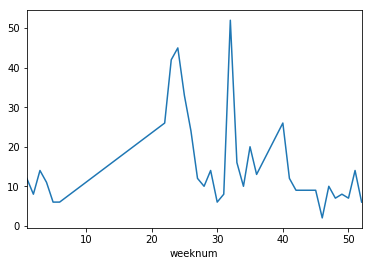

In [101]:
df_filtered.query('siteid==%s' % 3308110038)['amar'].groupby(df_filtered['weeknum']).sum().plot()

In [103]:
Site.objects.get(siteid=3308110038)

<Site: Site Kalmalo Dispensary>

In [104]:
df_filtered.head()


,index,contact_uuid,urn,name,groups,siteid,first_seen,last_seen,weeknum,role,...,dcur,dead,defu,dmed,tout,confirm,unique,siteid_lgt,state_num,lga_num
2,2,343bd73a-ac74-4835-b2e5-13590d61d335,2348081798563,Muhammad Ibrahim.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3313,2016-06-28 13:12:56,2016-06-28 13:15:33,26,Site,...,12,0,1,0,0,Yes,2348081798563 2016-06-28 13:12:56,4,33,3313
3,3,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-06-28 13:09:28,2016-06-28 13:19:16,23,Site,...,10,0,0,0,0,Yes,2347032140235 2016-06-28 13:09:28,10,33,3308
4,4,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 09:20:25,2016-07-10 09:33:28,22,Site,...,15,0,1,0,0,Yes,2347032140235 2016-07-10 09:20:25,10,33,3308
5,5,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 09:48:19,2016-07-10 10:02:26,23,Site,...,10,0,0,0,0,Yes,2347032140235 2016-07-10 09:48:19,10,33,3308
6,6,25ad4c50-5316-4f41-9aaf-d58aba7216ff,2347032140235,Abdullahi Lawali Araba.,"Imam Supervision, Imam Supervision 2, Imam Sup...",3308110010,2016-07-10 12:39:12,2016-07-10 12:51:23,24,Site,...,2,0,1,0,0,Yes,2347032140235 2016-07-10 12:39:12,10,33,3308


In [116]:
df_filtered['dcur'] = pd.to_numeric(df_filtered.dcur, errors='coerce')
df_filtered = df_filtered.query('dcur==dcur').query('0<dcur')
df_filtered['dcur'] = df_filtered.dcur.astype(int)
df_filtered['dcur'].unique()

array([  12,   10,   15,    2,   24,    8,   18,    5,    7,   16,   22,
         13,   14,   19,   25,   26,   28,   20,    4,   30,   29,    9,
         31,   11,    6,   39,    3,    1,   21,   17,  496,   34,  168,
         81,   53,   23,   36,   62,   32,   41,   33,   86,   27,   38,
         45,   49,   40,   48,   37,   47,   46,   42,   67,    0,   35,
         43,   99,   74,   79,   72,   61,   52,  219,   93,   65,   64,
         57,   66,   56,   55,   51,   68,   50,   58,   44,   80,   82,
         75,   78,   84,   60,   70,   89,   92,   77,  125,   54,  185,
         59,   69,   96,   83,   76,   71,   73,  423,  108,   98,   88,
        128,   85,   91,   94,  144,   90,   63,  118,  786,  123,  184,
        186,  193,  201,  130,  110,  124,  142,  288, 1943,  152,   87,
        113,  165,   97,  140,  114,  199,  102,  422,  101,   95,  107,
        120,  104,  100,  150,  196,  146,  166,  161,  121,  214,  194,
        109,  111,  187,  210,  295,  229,  148,  1

In [117]:
df_filtered['dead'] = pd.to_numeric(df_filtered.dead, errors='coerce')
df_filtered = df_filtered.query('dead==dead').query('0<dead')
df_filtered['dead'] = df_filtered.dead.astype(int)
df_filtered['dead'].unique()

array([  15,    1,    8,   22,   10,    3,    2,    4,    9,   12,   21,
         20,   47,   46,   11,    7,    5,    6,    0,   16,   75,  235,
        219,   25,   19,   18,   40,   14,   29,   27,   45,   28,   34,
         39,   23,   96,  124,   33,   90, 1943,   52,   41,  152,   60,
         26,  232,   17,   32,   37,   13,   64,   24,   95,  140,   62,
         49,   44,   54,   36,   35,  265,   51,  162,   48,   30,   50,
         42,  195,   55,   81,   38,   77,   84,  529])

In [118]:
df_filtered['defu'] = pd.to_numeric(df_filtered.defu, errors='coerce')
df_filtered = df_filtered.query('defu==defu').query('0<defu')
df_filtered['defu'] = df_filtered.defu.astype(int)
df_filtered['defu'].unique()

array([  1,  22,  36,  23,   7,   3,   2,  46,   4,   8,  10,  12,   5,
         6,  13,   0,  33,  20, 235,  29, 284,   9,  56,  39,  41,  18,
       104,  40,  49,  89,  34,  21, 170,  17,  11,  15,  16,  26, 232,
        52,  24,  45,  47,  14, 421,  31,  37,  27,  50,  54,  25,  19,
       119,  48,  80,  43, 194, 144,  42,  32, 195,  84,  51])

In [119]:
df_filtered['dmed'] = pd.to_numeric(df_filtered.dmed, errors='coerce')
df_filtered = df_filtered.query('dmed==dmed').query('0<dmed')
df_filtered['dmed'] = df_filtered.dmed.astype(int)
df_filtered['dmed'].unique()

array([ 22,   4,   1,  46,   2,  14,   5,   8,   3,   7,  15, 235,   9,
        12,   6,  56,  19,  18, 786,  78,  51,  52,  55,  77,  41,  20,
        24,  76,  25, 208,  45,  17,  47,  10,  11,  16, 162,  37,   0,
        44,  99,  42,  94, 195,  33,  35,  36,  84,  49,  13])

In [120]:
df_filtered['tout'] = pd.to_numeric(df_filtered.tout, errors='coerce')
df_filtered = df_filtered.query('tout==tout').query('0<tout')
df_filtered['tout'] = df_filtered.tout.astype(int)
df_filtered['tout'].unique()

array([496,  46,   2,  18,   5,   8,  16,   1,   4,  20,  11,  14,  10,
        75,   3,   6,   7, 786,  41,  36, 232,  17,  52,  30,  28,  12,
       208,  45,  47,   0,  50,  37, 187, 172,  26,  48,  23, 195,  13,
        84,  49,  51,   9])

In [122]:
# Default rate
# Numerator - defaults
# Denominator - total exits
df_filtered['total_exits']=df_filtered.dcur.astype(int)+df_filtered.dead+df_filtered.defu+df_filtered.dmed+df_filtered.tout

In [123]:
df_filtered.total_exits.head()

128     1058
736      230
1167      32
1251      62
1253      26
Name: total_exits, dtype: int64

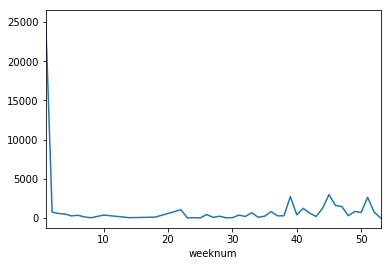

In [124]:
df_filtered['total_exits'].groupby(df_filtered['weeknum']).sum().plot()

In [125]:
df_filtered['default_rate']= df_filtered.defu / df_filtered.total_exits

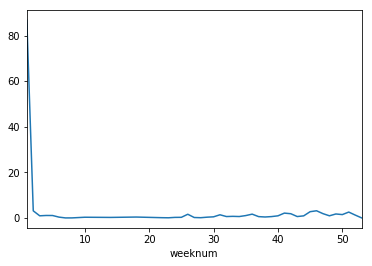

In [126]:
df_filtered['default_rate'].groupby(df_filtered['weeknum']).sum().plot()